In [3]:
import os
os.chdir("/Users/schmidle/Documents/GIT-Projects/FlatCurver/api")

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import FlatCurver.simulation.PandemicSimulator.PandemicSimulatorMulti as pan

In [5]:
def vhelp(x):
    # used to help with gamma to delta
    # delta is always 1-gamma, except if gamma is 0 then we usually have an error (lol)
    y = round(1-x,2)
    if y >= 0.999:
        return 0
    else:
        return y

vfunc = np.vectorize(lambda x: vhelp(x))

In [6]:
ger_pop = 8*10e7  #german population
ndim = 2

# Multi-Parameter plots with cross-infection
# See the Flatcurver Module for further description of parameters
beta = np.array([[1, 3/10, 3], [1/10, 2/10, 1], [0, 0.2, 1]])  # contact rate: given by RKI, a patient is 10 days infectious and infects 2 people during this time
gamma = np.diag([0.97/14, 0.96/14, 0.92/14])  #recovery rate: 0.97 percent survive while the average infection lasts for 14 days
delta = vfunc(gamma)


N = np.array([0.6*ger_pop, 0.2 * ger_pop, 0.2*ger_pop])

In [30]:
multi_pan = pan.PandemicSimulatorMulti(beta=beta, gamma=gamma, delta=delta, N=N, timesteps=120)

In [31]:
multi_pan.set_y0([N[0]-1, N[1], N[2], 0, 0, 0, 1, 0,0, 0, 0,0])

In [13]:
sol = multi_pan.simulate_SEIR()

In [10]:
multi_pan.names

AttributeError: 'PandemicSimulatorMulti' object has no attribute 'names'

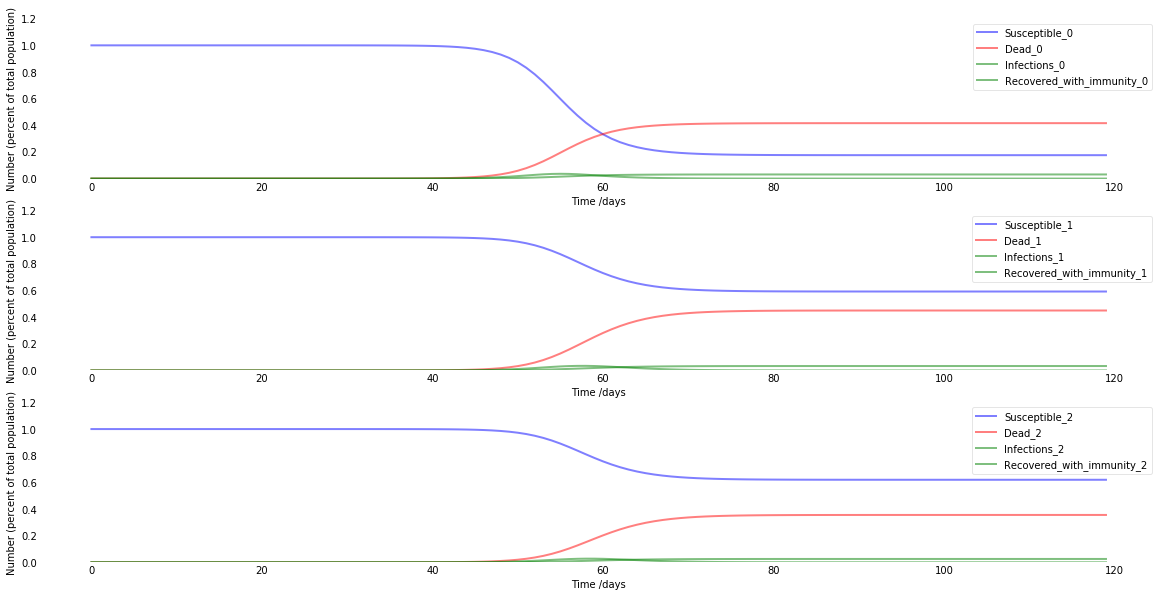

In [32]:
multi_pan.simulate_and_show_results()

In [ ]:
col_names = ['A', 'B', 'C']

In [ ]:
def deriv_multi(t, y):
    S, E, I, R = [y[self.ndim*i:self.ndim*(i+1)] for i in range(4)]
    dSdt = -1*np.dot(self.beta, I/self.N)*S
    dEdt = np.dot(self.delta, I)
    dRdt = np.dot(self.gamma, I)
    dIdt = 1/self.N*np.dot(self.beta, I)*S-dEdt-dRdt
    return [*dSdt, *dEdt, *dIdt, *dRdt]

In [ ]:
conditions = ['Susceptible', 'Dead', 'Infectious', 'Recovered']

In [ ]:
df = pd.DataFrame(sol.y.T, columns=[f'{cond}_{el}' for cond in conditions for el in col_names])

In [ ]:
df

In [ ]:
sol.y

#### AB HIER SIMULATION DEUTSCHLAND

In [ ]:
#beta = np.random.rand(16,16)
# make beta symmetric
#beta = 1/2*beta + 1/2*beta.T 

In [ ]:
einwohner = pd.read_csv('../../data/einwohner_bundeslaender.csv', sep='\t')

In [ ]:
ger_pop = 8*10e7  #german population
ndim = 2
#beta = np.random.rand(16,16)  # contact rate: given by RKI, a patient is 10 days infectious and infects 2 people during this time
beta = np.full((16,16),0.2)
gamma = np.diag([round(x,2) for x in list(np.random.rand(16)/20 + 0.95)])  #recovery rate: 0.97 percent survive while the average infection lasts for 14 days
delta = vfunc(gamma)
#delta = np.diag(list(np.random.rand(16)/100 + 0.03))  #death rate: 1-gamma
N = einwohner['Einwohner'].values
blands = list(einwohner['Bundesland'].values)

In [ ]:
#delta
double = np.vectorize(lambda t: t*2)

delta2 = double(delta)


In [ ]:
yes = [True for x in range(16)]
yes

In [ ]:
delta.copy()

In [ ]:
for i in range(0,len(yes)):
    delta[i,i] = delta[i,i]*2

In [ ]:
multi_pan = pan.PandemicSimulatorMulti(beta=beta, gamma=gamma, delta=delta, N=N, timesteps=120,names=blands,hospital_rates=[0.2 for i in range(16)],lethality_factor=2)

In [ ]:
multi_pan.set_y0([*N, *list(np.random.randint(1,100, 16)),*list([0]*16),*list([0]*16)])

In [ ]:
multi_pan.simulate_and_show_results()

In [ ]:
isinstance(np.array([2]), (np.ndarray))

In [ ]:
sol = multi_pan.simulate_SEIR()

In [ ]:
sol.y.shape

In [ ]:
sol.y

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(sol.t, sol.y.T[:,::4])